# Configuring nudge with `nudge_unit`

A new parameter, `nudge_unit`, has been added to `geom_text`, allowing you to specify the units in which the offset is applied.

Available values: `'identity'`, `'size'`, and `'px'`.

- `'identity'`: A value of 1 corresponds to the distance from 0 to 1 on the axis.
- `'size'`: A value of 1 corresponds to the diameter of a point with size 1.
- `'px'`: A value of 1 corresponds to 1 pixel.

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



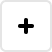
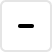
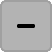
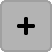
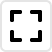
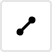
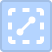
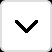
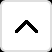
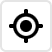
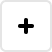
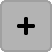
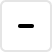
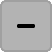
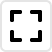
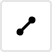
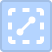
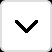
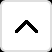
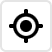

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

#### Without nudge

In [2]:
ggplot() + \
    geom_point(x=0, y=0, size=10, color='#DA8459') + \
    geom_text(x=0, y=0, label='text without nudge') + \
    ggsize(400, 300)

#### Different units
The `'size'` unit works well with `vjust/hjust`. Shifting the text by half the point size and adding `vjust` places it exactly at the edge of the point.

In [3]:
ggplot() + \
    xlim(-1, 4) + \
    geom_point(x=0, y=1, size=5, color='#B9534C') + \
    geom_text(x=0, y=1, label='identity 0.2', nudge_y=0.2) + \
    geom_point(x=1, y=1, size=5, color='#DA8459') + \
    geom_text(x=1, y=1, label='px 40', nudge_y=40, nudge_unit='px') + \
    geom_point(x=2, y=1, size=30, color='#EEAB65') + \
    geom_text(x=2, y=1, label='size 15', nudge_y=15, nudge_unit='size') + \
    geom_point(x=3, y=1, size=30, color='#F6C971') + \
    geom_text(x=3, y=1, label='size 15 vjust 0', nudge_y=15, vjust=0, nudge_unit='size') + \
    geom_text(x=3, y=1, label='size -15 vjust 1', nudge_y=-15, vjust=1, nudge_unit='size')

#### Use in `position_nudge()`

In [4]:
ggplot() + \
    geom_point(x=0, y=0, size=50, color='#DA8459') + \
    geom_text(x=0, y=0, label='position_nudge size 30', position=position_nudge(0, 30, 'size'))

#### Livemap
There are specific behaviors of nudge on LiveMap:

- `'identity'`: A value of 1 corresponds to 1 degree of latitude or longitude. The offset visually changes when zooming in.
- `'size'`: Like point size, it follows the `const_size_zoomin` parameter when zooming in.
- `'px'`: Maintains the offset in pixels regardless of zoom level.

In [5]:
layers = geom_point(x=-60, y=30, size=20, color='#B9534C') + \
    geom_text(x=-60, y=30, label='identity 5', nudge_y=5) + \
    geom_point(x=-40, y=30, size=20, color='#DA8459') + \
    geom_text(x=-40, y=30, label='px 40', nudge_y=40, nudge_unit='px') + \
    geom_point(x=-20, y=30, size=20, color='#EEAB65') + \
    geom_text(x=-20, y=30, label='size 15', nudge_y=15, nudge_unit='size')

scale_true = ggplot() + \
    geom_livemap(const_size_zoomin=-1)
    
scale_false = ggplot() + \
    geom_livemap(const_size_zoomin=0)

In [6]:
gggrid([
    scale_true + layers + ggtitle('scale true'), 
    scale_false + layers + ggtitle('scale false')    
])